### Упражнение 1
Напишите программу Python дляпостроенияграфиковфинансовыхданных Alphabet Inc. впериодс 3 октября 2016 г. по 7 октября 2016 г.


In [ ]:
from io import StringIO
from datetime import datetime
import math
import os
import warnings

import numpy as np
import pandas as pd
import matplotlib
from matplotlib.ticker import FuncFormatter, LinearLocator, MultipleLocator
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

%matplotlib inline

In [ ]:
data_1 = StringIO(
    '''Дата,открытие,максимум,минимум,закрытие
10-03-16,774.25,776.065002,769.5,772.559998
10-04-16,776.030029,778.710022,772.890015,776.429993
10-05-16,779.309998,782.070007,775.650024,776.469971
10-06-16,779,780.47998,775.539978,776.859985
10-07-16,779.659973,779.659973,770.75,775.080017
'''
)

In [ ]:
dateparse = lambda x: datetime.strptime(x, '%m-%d-%y')
df = pd.read_csv(data_1, parse_dates=['Дата'], date_parser=dateparse)
df.rename(columns={
  'Дата': 'Date', 
  'открытие':'Open', 
  'максимум':'High', 
  'минимум':'Low', 
  'закрытие':'Close'
}, inplace=True)
df.head()

,Date,Open,High,Low,Close
0,2016-10-03,774.250000,776.065002,769.500000,772.559998
1,2016-10-04,776.030029,778.710022,772.890015,776.429993
2,2016-10-05,779.309998,782.070007,775.650024,776.469971
3,2016-10-06,779.000000,780.479980,775.539978,776.859985
4,2016-10-07,779.659973,779.659973,770.750000,775.080017


In [ ]:
df = df.set_index(['Date'])
df.head()

,Open,High,Low,Close
Date,,,,
2016-10-03,774.250000,776.065002,769.500000,772.559998
2016-10-04,776.030029,778.710022,772.890015,776.429993
2016-10-05,779.309998,782.070007,775.650024,776.469971
2016-10-06,779.000000,780.479980,775.539978,776.859985
2016-10-07,779.659973,779.659973,770.750000,775.080017


Выбор стиля:

In [ ]:
plt.style.use('ggplot')

Вывод результата:

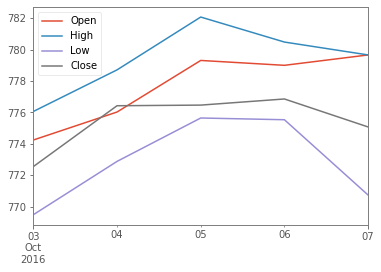

In [ ]:
_, ax = plt.subplots()
ax.patch.set_facecolor('w')
ax.spines['top'].set_color('0.5')
ax.spines['right'].set_color('0.5')
ax.spines['bottom'].set_color('0.5')
ax.spines['left'].set_color('0.5')
ax.margins(0.05)
ax.xaxis.get_label().set_visible(False)

df.plot(kind='line', ax=ax)

legend = ax.legend()
legend.get_frame().set_facecolor('w')

save_path = 'homework_1_4_kamashev_rafael'
if not os.path.exists(save_path):
    os.makedirs(save_path)

plt.savefig(os.path.join(save_path, 'plot_01.png'))
plt.show()
plt.close()

### Упражнение 2
Напишите программу Python для отображения сетки и построения линейных диаграмм конечной стоимости Alphabet Inc. в период с 3 октября 2016 года по 7 октября 2016 года. Настроены линии сетки со стилем линий -, шириной 0,5. и цвет синий.

In [ ]:
data_2 = StringIO(
    f'''Дата,закрытие
03-10-16,772.559998
04-10-16,776.429993
05-10-16,776.469971
06-10-16,776.859985
07-10-16,775.080017'''
)


In [ ]:
dateparse = lambda x: datetime.strptime(x, '%d-%m-%y')
df2 = pd.read_csv(data_2, parse_dates=['Дата'], date_parser=dateparse)
df2.rename(columns={
  'Дата': 'Date', 
  'закрытие': 'Closing Value'
}, inplace=True)
df2.head()

,Date,Closing Value
0,2016-10-03,772.559998
1,2016-10-04,776.429993
2,2016-10-05,776.469971
3,2016-10-06,776.859985
4,2016-10-07,775.080017


In [ ]:
df2 = df2.set_index(['Date'])
df2.head()

,Closing Value
Date,
2016-10-03,772.559998
2016-10-04,776.429993
2016-10-05,776.469971
2016-10-06,776.859985
2016-10-07,775.080017


Вывод диаграммы:

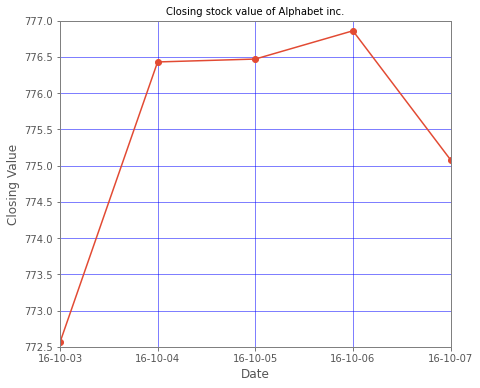

In [ ]:
def date_formatter(x, pos):
  x = matplotlib.dates.num2date(x)
  return x.strftime('%y-%m-%d')


_, ax = plt.subplots(figsize=(7, 6))
closing_value = df2['Closing Value']
ax.plot(
    df2.index.to_pydatetime(), closing_value,
    linestyle='-', marker='o'
)

ax.patch.set_facecolor('w')
ax.spines['top'].set_color('0.5')
ax.spines['right'].set_color('0.5')
ax.spines['bottom'].set_color('0.5')
ax.spines['left'].set_color('0.5')

# Grids & ticks

y_min, y_max = (
    math.floor(closing_value.min() * 2) / 2,
    math.ceil(closing_value.max())
)
ax.set_ylim([y_min, y_max])
ax.set_xlim([df2.index[0], df2.index[-1]])
ax.xaxis.set_major_formatter(FuncFormatter(date_formatter))
ax.grid(color='b', linestyle='-', linewidth=.5)

x_locator = LinearLocator(df.index.size)
ax.xaxis.set_major_locator(x_locator)

ax.set(xlabel='Date', ylabel='Closing Value')
ax.set_title('Closing stock value of Alphabet inc.', fontsize=10)

plt.savefig(os.path.join(save_path, 'plot_02.png'))
plt.show()
plt.close()

### Упражнение 3
Напишите программу Python для отображения гистограммы популярности языков программирования.

In [ ]:
data_3 = StringIO(
    f'''Language,Popularity
Java,22.2
Python,17.6
PHP,8.8
JavaScript,8
C#,7.7
C++,6.7'''
)

In [ ]:
df3 = pd.read_csv(data_3)
df3 = df3.set_index(['Language'])
df3.head()

,Popularity
Language,
Java,22.2
Python,17.6
PHP,8.8
JavaScript,8.0
C#,7.7


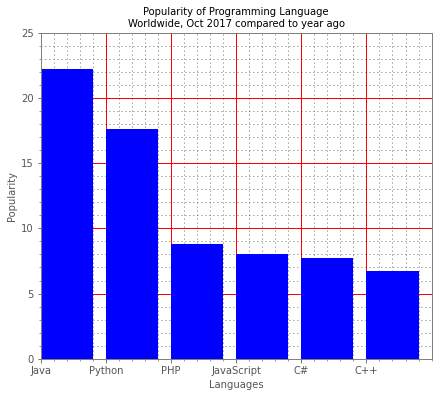

In [ ]:
_, ax = plt.subplots(figsize=(7, 6))
df3.plot.bar(
    color='b', width=.8, align='edge', rot=0, ax=ax
)
ax.legend().set_visible(False)

ax.patch.set_facecolor('w')
ax.spines['top'].set_color('0.5')
ax.spines['right'].set_color('0.5')
ax.spines['bottom'].set_color('0.5')
ax.spines['left'].set_color('0.5')

ax.set_xlabel('Languages', fontsize=10)
ax.set_ylabel('Popularity', fontsize=10)
ax.set_title('''Popularity of Programming Language
Worldwide, Oct 2017 compared to year ago''', fontsize=10)

ax.yaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.grid(True, 'major', color='r', linewidth=1)
ax.yaxis.grid(True, 'minor', color='#333333', linestyle=(0, (1, 4)))

ax.xaxis.set_minor_locator(MultipleLocator(.2))
ax.xaxis.grid(True, 'major', color='r', linewidth=1)
ax.xaxis.grid(True, 'minor', color='#333333', linestyle=(0, (1, 4)))

ax.set_ylim([0, math.ceil(df3['Popularity'].max() / 5) * 5])
ax.set_xlim([0, df3.index.size])

plt.savefig(os.path.join(save_path, 'plot_03.1.png'))
plt.show()

No handles with labels found to put in legend.


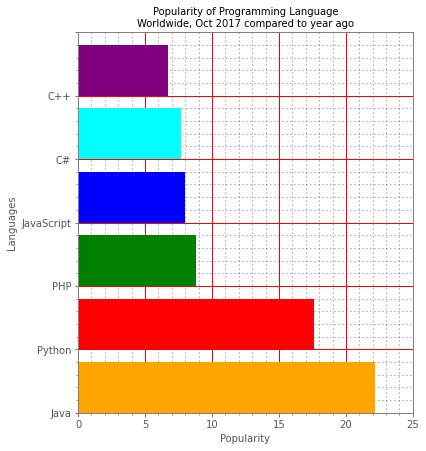

In [ ]:
_, ax = plt.subplots(figsize=(6, 7))
ax.barh(
    df3.index, df3['Popularity'],
    align='edge', color=['orange', 'red', 'green', 'blue', 'cyan', 'purple']
)
ax.legend().set_visible(False)

ax.patch.set_facecolor('w')
ax.spines['top'].set_color('0.5')
ax.spines['right'].set_color('0.5')
ax.spines['bottom'].set_color('0.5')
ax.spines['left'].set_color('0.5')

ax.set_xlabel('Popularity', fontsize=10)
ax.set_ylabel('Languages', fontsize=10)
ax.set_title('''Popularity of Programming Language
Worldwide, Oct 2017 compared to year ago''', fontsize=10)

ax.yaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(0.2))
ax.yaxis.grid(True, 'major', color='r', linewidth=1)
ax.yaxis.grid(True, 'minor', color='#333333', linestyle=(0, (1, 4)))

ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.grid(True, 'major', color='r', linewidth=1)
ax.xaxis.grid(True, 'minor', color='#333333', linestyle=(0, (1, 4)))

_ = ax.set_xlim([0, math.ceil(df3['Popularity'].max() / 5) * 5])
_ = ax.set_ylim([0, df3.index.size])

plt.savefig(os.path.join(save_path, 'plot_03.2.png'))
plt.show()

### Упражнение 4
Напишите программу на Python, чтобы создать график столбиков стека и добавить метку к каждому разделу.

In [ ]:
people = ('G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8')
segments = 4
# multi-dimensional data
raw_data_4 = [
    [3.40022085, 7.70632498, 6.4097905, 10.51648577, 7.5330039, 7.1123587, 12.77792868, 3.44773477],
    [11.24811149, 5.03778215, 6.65808464, 12.32220677, 7.45964195, 6.79685302, 7.24578743, 3.69371847],
    [3.94253354, 4.74763549, 11.73529246, 4.6465543, 12.9952182, 4.63832778, 11.16849999, 8.56883433],
    [4.24409799, 12.71746612, 11.3772169, 9.00514257, 10.47084185, 10.97567589, 3.98287652, 8.80552122]
]
# через python
# data_4 = {man: [x[i] for x in raw_data_4] for i, man in enumerate(people)}
# df4 = pd.DataFrame.from_dict(data_4, orient='index')
# через numpy веселее
people_array = np.array(raw_data_4)
people_array = people_array.T
df4 = pd.DataFrame(people_array, index=people)
df4.head(8)

,0,1,2,3
G1,3.400221,11.248111,3.942534,4.244098
G2,7.706325,5.037782,4.747635,12.717466
G3,6.409790,6.658085,11.735292,11.377217
G4,10.516486,12.322207,4.646554,9.005143
G5,7.533004,7.459642,12.995218,10.470842
G6,7.112359,6.796853,4.638328,10.975676
G7,12.777929,7.245787,11.168500,3.982877
G8,3.447735,3.693718,8.568834,8.805521


Рассчитаем суммы и проценты

In [ ]:
totals = df4.sum(axis=1)
percentages = df4.div(totals, axis=0) * 100
# приведем к ряду % от общего количества по каждому человеку, транспонируем 
# и развернем, чтобы итерировать по "кускам" гистограммы 
percentages_flat = percentages.to_numpy().T.flatten()
percentages_flat

array([14.89041485, 25.50985379, 17.71620338, 28.81987817, 19.58725267,
       24.09073201, 36.32663833, 14.06331237, 49.25828459, 16.67631282,
       18.40247065, 33.76836194, 19.39649756, 23.02206223, 20.59919929,
       15.06668004, 17.26533732, 15.71585516, 32.43551063, 12.73363857,
       33.79005584, 15.71078122, 31.75116015, 34.95228081, 18.58596324,
       42.09797823, 31.44581534, 24.67812132, 27.22619393, 37.17642454,
       11.32300222, 35.91772678])

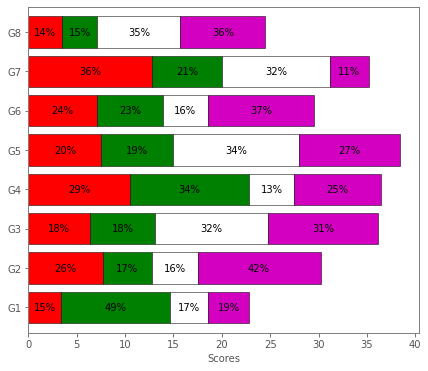

In [ ]:
_, ax = plt.subplots(figsize=(7, 6))
df4.plot(
    kind='barh', stacked=True, ax=ax, width=0.8,
    color=['r', 'g', 'w', '#d300c2'], edgecolor='0'
)
ax.legend().set_visible(False)

ax.patch.set_facecolor('w')
ax.spines['top'].set_color('0.5')
ax.spines['right'].set_color('0.5')
ax.spines['bottom'].set_color('0.5')
ax.spines['left'].set_color('0.5')

ax.set_xlabel('Scores', fontsize=10)

# _ = ax.set_xlim([0, math.ceil(df3['Popularity'].max() / 5) * 5])
# _ = ax.set_ylim([0, df3.index.size])
y_offset = -0.48
for i, bar in enumerate(ax.patches):
    # print(bar.get_width(), i)
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + bar.get_y() + y_offset,
        f'{round(percentages_flat[i])}%',
        ha='center',
        color='black',
        size=10
    )

plt.savefig(os.path.join(save_path, 'plot_04.png'))
plt.show()
plt.close()

### Упражнение 5
Напишите программу на Python, чтобы нарисовать scatter диаграмму рассеяния для сравнения двух предметных оценок по математике и естествознанию. Используйте оценки 10 учеников.

In [ ]:
math_marks = [88, 92, 80, 89, 100, 80, 60, 100, 80, 34]
science_marks = [35, 79, 79, 48, 100, 88, 32, 45, 20, 30]
marks_range = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

df5 = pd.DataFrame({
    'Math marks': math_marks,
    'Science marks': science_marks,
    'Marks range': marks_range
})
df5.head()

,Math marks,Science marks,Marks range
0,88,35,10
1,92,79,20
2,80,79,30
3,89,48,40
4,100,100,50


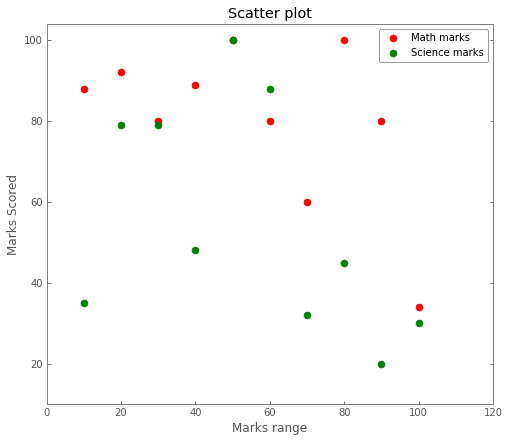

In [ ]:
_, ax = plt.subplots(figsize=(8, 7), sharey='col')

df5.plot.scatter(
    x='Marks range', y='Math marks', color='r', s=50,
    label='Math marks', ax=ax
)    
df5.plot.scatter(
    x='Marks range', y='Science marks', color='g', s=50,
    label='Science marks', ax=ax
)
ax.tick_params(which='major', left=True, right=True, direction='in')
ax.set_title('Scatter plot')
ax.set_ylabel('Marks Scored')

ax.patch.set_facecolor('w')
ax.spines['top'].set_color('0.5')
ax.spines['right'].set_color('0.5')
ax.spines['bottom'].set_color('0.5')
ax.spines['left'].set_color('0.5')

ax.set_xlim([0, 120])
ax.set_yticks(np.array(marks_range))
ax.yaxis.set_major_locator(MultipleLocator(20))
legend_frame = ax.legend().get_frame()
legend_frame.set_facecolor('w')
legend_frame.set_edgecolor('0')

plt.savefig(os.path.join(save_path, 'plot_05.png'))
plt.show()
plt.close()